# Develop a Neural Network that can read Handwriting

IMPORTING LIBRARIES TO SETUP KERAS

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop

Load a MNIST Dataset

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

Split of train and test set with 60k samples in training and 10k samples in test

In [3]:
train = mnist_train_images.reshape(60000,784)
test = mnist_test_images.reshape(10000,784)

Convert the input in which keras accept.The inputs are in pixel values(0-255),We can change to (0-1)

In [4]:
train = train.astype('float32')
test = test.astype('float32')
train /=255
test /=255

One Hot Encoding Vectors.

In [5]:
train_labels = keras.utils.to_categorical(mnist_train_labels,10)
test_labels = keras.utils.to_categorical(mnist_test_labels,10)

Visualizing the dataset

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


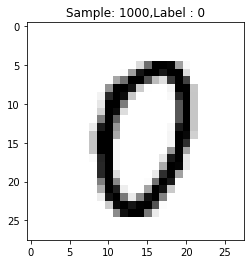

In [6]:
import matplotlib.pyplot as plt
def display(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    image = train[num].reshape([28,28])
    plt.title('Sample: %d,Label : %d' % (num,label))
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display(1000)

Building Sequential Model in neural network

In [7]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Model Optimization

In [9]:
model.compile(loss = 'categorical_crossentropy',optimizer = RMSprop(),metrics=['accuracy'])

Fitting the training data to model

In [10]:
history = model.fit(train,train_labels,batch_size=100,epochs=10,verbose=2)

Epoch 1/10
600/600 - 18s - loss: 0.2366 - accuracy: 0.9258 - 18s/epoch - 30ms/step
Epoch 2/10
600/600 - 14s - loss: 0.1019 - accuracy: 0.9696 - 14s/epoch - 23ms/step
Epoch 3/10
600/600 - 15s - loss: 0.0782 - accuracy: 0.9771 - 15s/epoch - 25ms/step
Epoch 4/10
600/600 - 14s - loss: 0.0629 - accuracy: 0.9819 - 14s/epoch - 23ms/step
Epoch 5/10
600/600 - 15s - loss: 0.0529 - accuracy: 0.9849 - 15s/epoch - 26ms/step
Epoch 6/10
600/600 - 19s - loss: 0.0470 - accuracy: 0.9868 - 19s/epoch - 32ms/step
Epoch 7/10
600/600 - 14s - loss: 0.0406 - accuracy: 0.9885 - 14s/epoch - 23ms/step
Epoch 8/10
600/600 - 15s - loss: 0.0391 - accuracy: 0.9890 - 15s/epoch - 25ms/step
Epoch 9/10
600/600 - 15s - loss: 0.0357 - accuracy: 0.9906 - 15s/epoch - 24ms/step
Epoch 10/10
600/600 - 14s - loss: 0.0313 - accuracy: 0.9915 - 14s/epoch - 23ms/step


Model Evaluation

In [11]:
score = model.evaluate(test,test_labels,verbose=0)
print('Test Loss',score[0])
print('Test Accuracy',score[1])


Test Loss 0.09549103677272797
Test Accuracy 0.9830999970436096


Findiny which number have been wrongly predicted

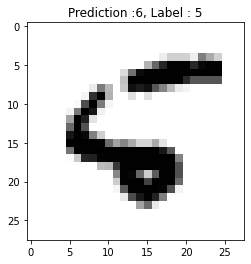

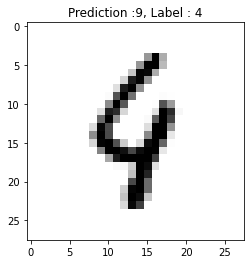

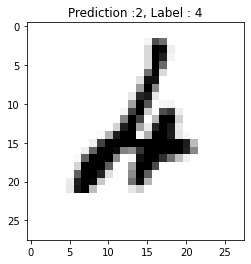

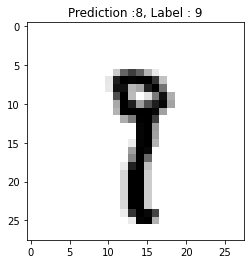

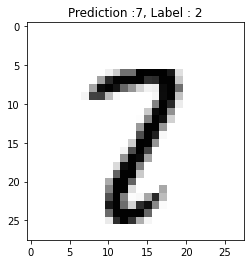

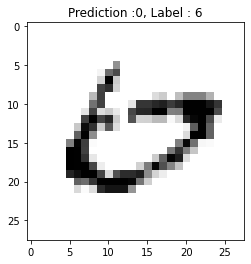

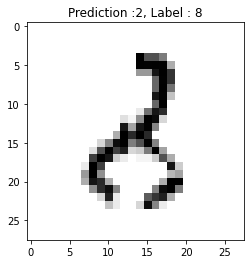

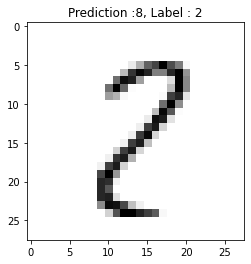

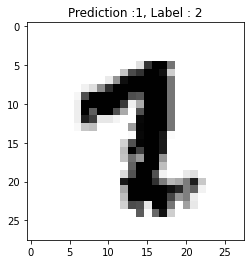

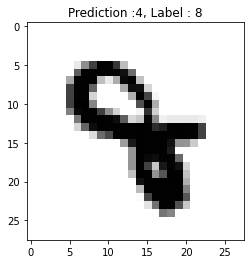

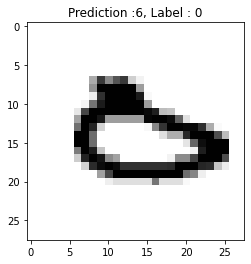

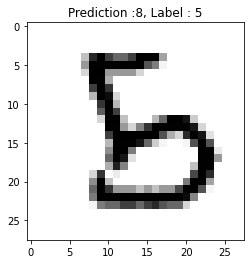

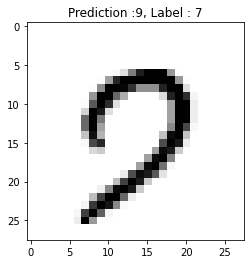

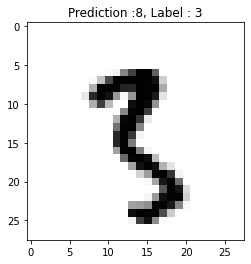

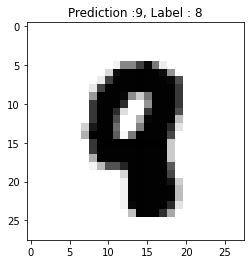

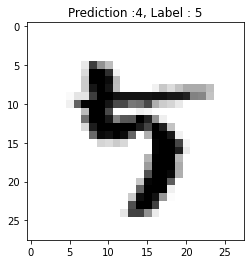

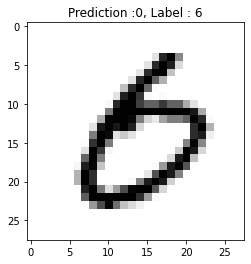

In [12]:
for x in range(1000):
    test_image = test[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if(predicted_cat != label):
        plt.title('Prediction :%d, Label : %d' % (predicted_cat,label))
        plt.imshow(test_image.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
        plt.show()